# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Elvis | Nyarko | Elvis Kwaku Nyarko, 11/26/2024  | 20 | 25% |
| Member 2: | Barentu | Gobena | Barentu Gobena, 11/26/2024 | 20 | 25% |
| Member 3: | Krunal | Pathak | Krunal Suresh Pathak, 11/26/2024 | 20 | 25% |
| Member 4: | Varshin | Gajapathy | Varshin Ganapathy Gajapathy, 11/26/2024 | 20 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe
cv_set = pd.read_csv('/content/drive/MyDrive/ENGG680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/ENGG680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/ENGG680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')


For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [4]:
# TODO: Display first two rows of cv_set
# (1 mark)
cv_set.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.050000e-07,1.320000e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.030000e-06,1.070000e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [5]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [6]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
cv_set_shape = cv_set.shape
test_set1_shape = test_set1.shape
test_set2_shape = test_set2.shape

print(f"'cv_set' has {cv_set_shape[0]} rows and {cv_set_shape[1]} columns")
print(f"'test_set1' has {test_set1_shape[0]} rows and {test_set1_shape[1]} columns")
print(f"'test_set2' has {test_set2_shape[0]} rows and {test_set2_shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [7]:
# TODO: Display all columns in cv_set
# (1 mark)
cv_set.columns.tolist()

['ax_sum',
 'ay_sum',
 'az_sum',
 'gx_sum',
 'gy_sum',
 'gz_sum',
 'a_sum',
 'g_sum',
 'ax_var',
 'ay_var',
 'az_var',
 'gx_var',
 'gy_var',
 'gz_var',
 'a_var',
 'g_var',
 'ax_min',
 'ay_min',
 'az_min',
 'gx_min',
 'gy_min',
 'gz_min',
 'a_min',
 'g_min',
 'ax_max',
 'ay_max',
 'az_max',
 'gx_max',
 'gy_max',
 'gz_max',
 'a_max',
 'g_max',
 'motion_state']

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [8]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

# Display the first few entries of y to confirm
y.head(2)

,motion_state
0,rest
1,rest


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [9]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])

# Display the first few rows of X to confirm
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.050000e-07,1.320000e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.030000e-06,1.070000e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [11]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Display the sizes of the resulting splits
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1073, 32), (1073,)), ((461, 32), (461,)))

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [12]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('classifier', SVC())         # SVC as the classifier
])

# Display the pipeline to confirm
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [13]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Options for scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Values for C
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Values for gamma
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}

# Display the parameter grid
param_grid

{'scaler': [StandardScaler(), RobustScaler(), None],
 'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__gamma': [0.001, 0.01, 0.1, 1],
 'classifier__kernel': ['rbf']}

In [14]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [15]:
# TODO: Print the results from the grid search
# (2 marks)

# Initialize the GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(
    pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the results from the grid search
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

print("Best params:\n{}\n".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Test-set score: {:.2f}".format(test_score))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

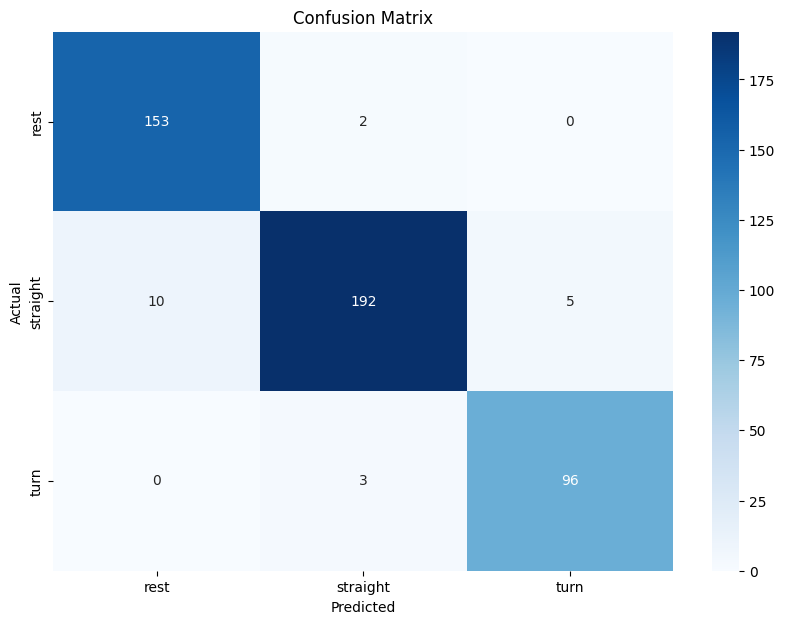

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [16]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the best model from the grid search
y_pred = grid_search.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n")
print(class_report)

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. **Comment on the fit of the model to the dataset**

The fit of the model to the dataset can be assessed by analyzing the classification metrics from the confusion matrix and the classification report. Key points to consider:

**Accuracy**: A high test set accuracy indicates that the model generalizes well to unseen data. If there's a significant gap between training and test accuracy, the model might overfit.

**Precision**, Recall, and F1-Score: The classification report provides these metrics for each class. Consistently high scores across all classes indicate a well-balanced fit, while lower scores for specific classes could suggest difficulty in correctly classifying those.

**Confusion Matrix**: It visually shows where the model misclassifies. If most predictions lie on the diagonal, the model performs well. However, a high number of off-diagonal entries indicate issues with misclassification.

If the metrics (accuracy, precision, recall, and F1-score) are satisfactory, the model's fit is likely appropriate for the dataset. Otherwise, further tuning or alternative modeling approaches may be required.

2. **Suitability of intervals for C and gamma in the grid search**

The intervals used for C
[
0.01
,
0.1
,
1
,
10
,
100
]
[0.01,0.1,1,10,100] and gamma
[
0.001
,
0.01
,
0.1
,
1
]
[0.001,0.01,0.1,1] are reasonable and commonly used starting ranges for hyperparameter tuning in SVMs:

**C:**

A low C (e.g., 0.01) allows more margin violations, potentially underfitting the model.
A high C (e.g., 100) penalizes margin violations more strictly, which can lead to overfitting.
The selected range provides a good balance for exploring both ends of the spectrum.

**Gamma:**

Low gamma values (e.g., 0.001) make the decision boundary smoother, potentially underfitting.
High gamma values (e.g., 1) create a more complex decision boundary, potentially overfitting.
The chosen range is sufficient for initial exploration of the kernel's behavior.

However, if the results indicate suboptimal performance, finer granularity within these intervals (e.g., using values like C=[0.05, 0.5, 5, 50] or gamma=[0.005, 0.05, 0.5]) or expanding the range (e.g., adding C=1000 or gamma=0.0001) might be required for better tuning.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [17]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']  # Target vector
X1 = test_set1.drop(columns=['motion_state'])  # All features

# Display the first 2 rows of X1
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [18]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']  # Target vector
X2 = test_set2.drop(columns=['motion_state'])  # All features

# Display the first 2 rows of X2
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [19]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

# Calculate and print test score accuracies for test_set1 and test_set2
test_set1_score = grid_search.score(X1, y1)
test_set2_score = grid_search.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

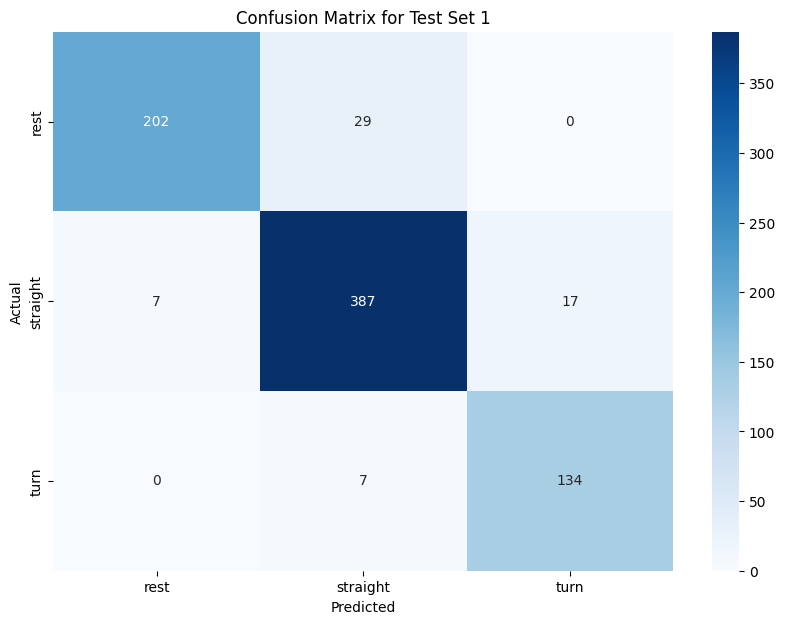

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.97      0.87      0.92       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.93      0.92      0.92       783



In [20]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
# Generate predictions using the best model from the grid search for test_set1
y1_pred = grid_search.predict(X1)

# Generate the confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix1,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y1.unique()),  # Ensure labels are in sorted order
    yticklabels=sorted(y1.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report for test_set1
class_report1 = classification_report(y1, y1_pred, zero_division=0)
print("Classification Report for Test Set 1:\n")
print(class_report1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

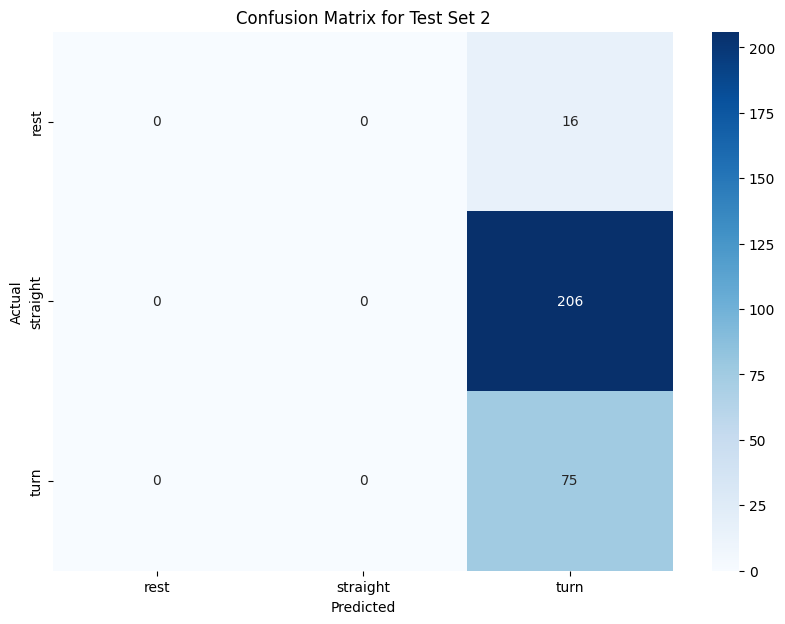

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [21]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Generate predictions using the best model from the grid search for test_set2
y2_pred = grid_search.predict(X2)

# Generate the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix2,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y2.unique()),  # Ensure labels are in sorted order
    yticklabels=sorted(y2.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report for test_set2
class_report2 = classification_report(y2, y2_pred, zero_division=0)
print("Classification Report for Test Set 2:\n")
print(class_report2)


___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
**1.1 Model's Performance on the Datasets**

The model's performance across the datasets
(
𝑋
test
,
𝑦
test
)
(X
test
​
 ,y
test
​
 ),
(
𝑋
1
,
𝑦
1
)
(X
1
​
 ,y
1
​
 ), and
(
𝑋
2
,
𝑦
2
)
(X
2
​
 ,y
2
​
 ) is expected to show significant differences. Specifically:

Performance on
(
𝑋
test
,
𝑦
test
)
(X
test
​
 ,y
test
​
 ):

Since
(
𝑋
test
,
𝑦
test
)
(X
test
​
 ,y
test
​
 ) is derived from the same distribution as the training data, the model is likely to perform better here, as it reflects patterns learned during training.
Performance on
(
𝑋
1
,
𝑦
1
)
(X
1
​
 ,y
1
​
 ) and
(
𝑋
2
,
𝑦
2
)
(X
2
​
 ,y
2
​
 )**:

If the model performs poorly on these datasets, it suggests that the data distributions in
(
𝑋
1
,
𝑦
1
)
(X
1
​
 ,y
1
​
 ) and
(
𝑋
2
,
𝑦
2
)
(X
2
​
 ,y
2
​
 ) differ significantly from the training data distribution. This phenomenon is an example of dataset shift or domain mismatch.

**1.2 What Is This an Example Of?**
The significant difference in performance across the datasets is an example of domain shift or dataset bias. This occurs when the training data distribution differs from the distribution of test or real-world data, leading to poor generalization.


**2.1 Potential Causes for Observed Behavior**

**Data Distribution Shift**:Differences in feature values (e.g., sensor readings) or target label distributions (e.g., class imbalances) between the training and test datasets could cause the model to struggle in recognizing patterns.

**Overfitting:**The model may have memorized patterns specific to the training data, failing to generalize to datasets like
(
𝑋
1
,
𝑦
1
)
(X
1
​
 ,y
1
​
 ) and
(
𝑋
2
,
𝑦
2
)
(X
2
​
 ,y
2
​
 ) that contain unseen scenarios.

**Insufficient Training Data:**Limited or non-representative training data can result in a model that does not adequately capture the variability in real-world scenarios.

**Hyperparameter Choices:**The selected hyperparameters for the SVM model (e.g., C, gamma, or kernel) might overfit to the training dataset, leading to poor performance on unseen data.

**Data Quality Issues:**Noise, missing values, or sensor errors in
(
𝑋
1
,
𝑦
1
)
(X
1
​
 ,y
1
​
 ) and
(
𝑋
2
,
𝑦
2
)
(X
2
​
 ,y
2
​
 ) can make these datasets harder for the model to interpret.

**2.2 Possible Solutions**
Data Augmentation or Collection:

Collect more diverse training data or use techniques like augmentation to better reflect real-world scenarios.
Domain Adaptation:

Use transfer learning or domain adaptation techniques to adapt the model to the new data distributions.
Regularization and Hyperparameter Tuning:

Adjust hyperparameters to avoid overfitting and improve generalization.
Feature Engineering:

Analyze and preprocess features to ensure consistency across datasets.
Evaluate on Realistic Data:

Always validate the model on independent datasets like
(
𝑋
1
,
𝑦
1
)
(X
1
​
 ,y
1
​
 ) and
(
𝑋
2
,
𝑦
2
)
(X
2
​
 ,y
2
​
 ) to ensure robustness before deployment.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
# Extract the selected features from the cv_set dataframe
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display the first few rows of the new dataframe X
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.050000e-07,1.320000e-07,9.789349,9.797418,7.450000e-10
1,1.030000e-06,1.070000e-07,9.789095,9.798815,6.980000e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few rows of y to confirm
y.head(2)

,motion_state
0,rest
1,rest


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Display the sizes of the resulting splits
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1073, 5), (1073,)), ((461, 5), (461,)))

In [ ]:
pipel = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('classifier', SVC())         # SVC as the classifier
])

# Display the pipeline to confirm
pipel

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [ ]:
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Options for scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Values for C
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Values for gamma
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}

# Display the parameter grid
param_grid

{'scaler': [StandardScaler(), RobustScaler(), None],
 'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__gamma': [0.001, 0.01, 0.1, 1],
 'classifier__kernel': ['rbf']}

In [ ]:
grid = GridSearchCV(pipel, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# Initialize the GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(
    pipel, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the results from the grid search
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

print("Best params:\n{}\n".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Test-set score: {:.2f}".format(test_score))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

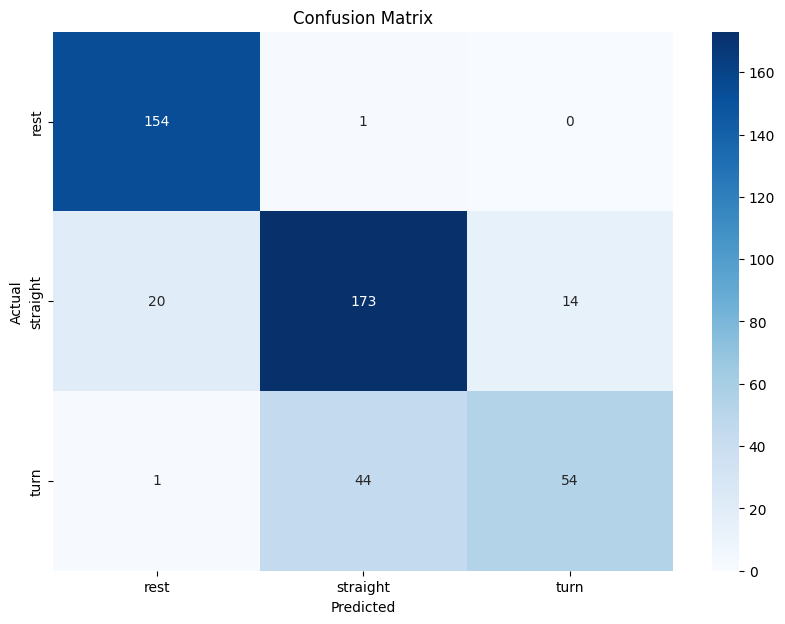

Classification Report:

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [ ]:
# TODO - Display confusion matrix and print classification reports
# Generate predictions using the best model from the grid search
y_pred = grid_search.predict(X_test)

# Generate predictions using the best model from the grid search
y_pred = grid_search.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y_test.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y_test.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n")
print(class_report)


___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
Based on just these two evaluations, section 1.2.3 model is a better fit because:

1. It achieves higher accuracy (95-96%) on both cross-validation and test sets.

2. It generalizes well, as evidenced by the small difference between cross-validation and test scores.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1['motion_state']  # Target vector for test_set1
X1 = test_set1[selected_features]  # Selected features for test_set1
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']  # Target vector for test_set2
X2 = test_set2[selected_features]  # Selected features for test_set2
X2.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
test_set1_score = grid_search.score(X1, y1)
test_set2_score = grid_search.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

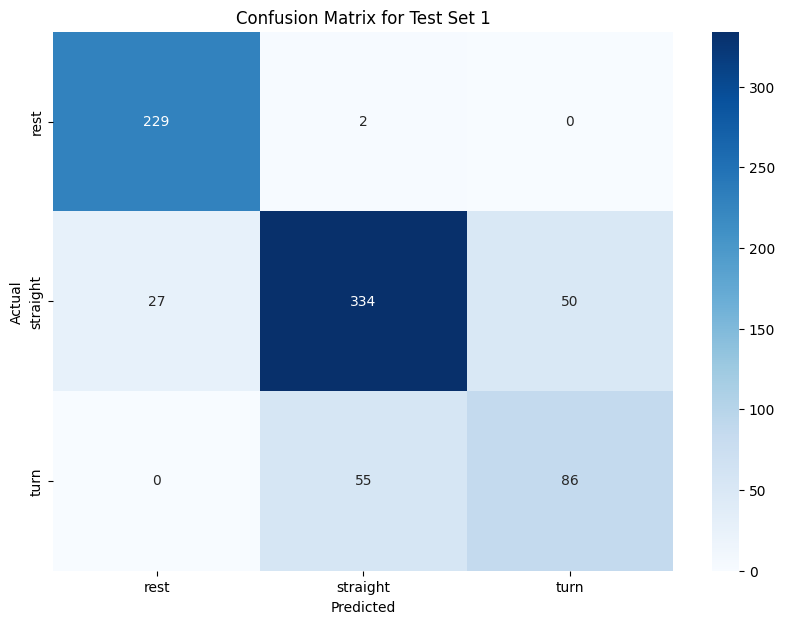

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.89      0.99      0.94       231
    straight       0.85      0.81      0.83       411
        turn       0.63      0.61      0.62       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the best model from the grid search for test_set1
y1_pred = grid_search.predict(X1)

# Generate the confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix1,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y1.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y1.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report for test_set1
class_report1 = classification_report(y1, y1_pred, zero_division=0)
print("Classification Report for Test Set 1:\n")
print(class_report1)


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

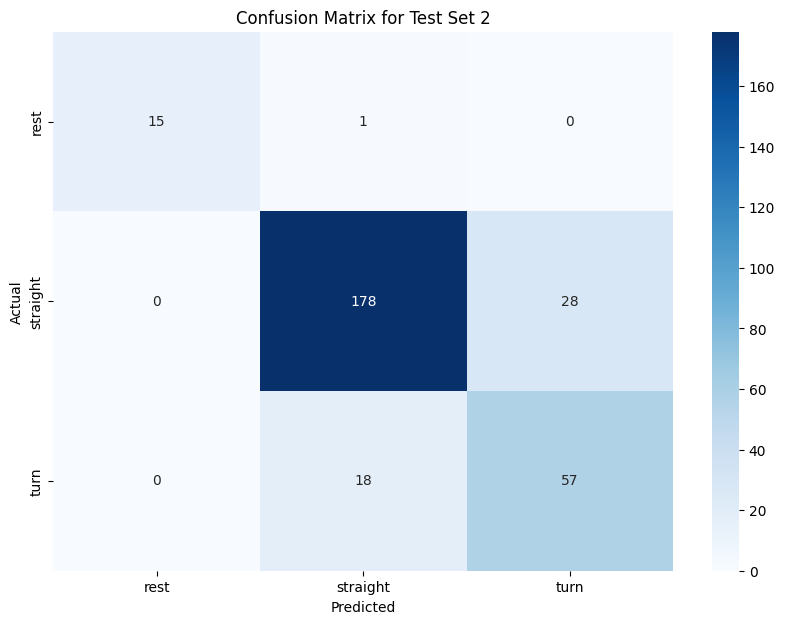

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Generate predictions using the best model from the grid search for test_set2
y2_pred = grid_search.predict(X2)

# Generate the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix2,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y2.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y2.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report for test_set2
class_report2 = classification_report(y2, y2_pred, zero_division=0)
print("Classification Report for Test Set 2:\n")
print(class_report2)


___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
**1. Comparison of Model's Performance in Section 2**

In Section 2, the model achieves consistent performance on training/validation data (
0.82
0.82 cross-validation train score and
0.83
0.83 test score), indicating moderate generalization within the same domain. However, its performance drops significantly on independent datasets (
𝑋
1
,
𝑦
1
X
1
​
 ,y
1
​
  and
𝑋
2
,
𝑦
2
X
2
​
 ,y
2
​
 ), highlighting challenges in handling domain shifts or differing data distributions. This suggests the model may lack robustness and struggle to generalize to new scenarios, potentially due to overfitting to the training data or insufficient diversity in the training dataset. Further improvements in feature engineering, domain adaptation, or dataset diversity are needed to enhance its performance on independent datasets.

**How the model fits:** The model demonstrates reasonable performance on the training/validation set (0.82 → 0.83), indicating it generalizes moderately well within the same domain. However, significant performance drops on independent datasets (
𝑋
1
,
𝑦
1
X
1
​
 ,y
1
​
  and
𝑋
2
,
𝑦
2
X
2
​
 ,y
2
​
 ) highlight limited generalization and a possible inability to handle domain shifts effectively. This suggests overfitting to the training data's specific patterns and challenges in capturing the full complexity of the task.

**2. Comparison Between Sections 1 and 2**

The Section 1 model demonstrates superior performance and generalization, with high cross-validation (0.95) and test-set scores (0.96), indicating robust fit and minimal gaps across datasets. In contrast, the Section 2 model shows moderate performance (0.82 → 0.83) on training/validation but struggles significantly on independent datasets (
𝑋
1
,
𝑦
1
X
1
​
 ,y
1
​
  and
𝑋
2
,
𝑦
2
X
2
​
 ,y
2
​
 ), highlighting limited generalization and difficulty handling domain shifts, likely due to a harder task or suboptimal feature engineering.


____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**

**Selected Features**

ax_var: Variance of accelerometer readings in the x-axis.

ay_var: Variance of accelerometer readings in the y-axis.

az_sum: Sum of accelerometer readings in the z-axis.

a_sum: Sum of the norm of accelerometer x, y, and z readings.

gz_var: Variance of gyroscope readings in the z-axis.

g_sum: Sum of gyroscope readings in all axes.

gx_var: Variance of gyroscope readings in the x-axis.

a_var: Variance of the norm of accelerometer readings in all axes.

**Reason for Selection**

The selected features (ax_var, ay_var, az_sum, a_sum, gz_var, g_sum, gx_var, and a_var) were chosen for their ability to capture key representations of motion, such as acceleration trends and angular variations, which are critical for distinguishing between different motion states. Variance metrics highlight changes in motion, while summed metrics provide aggregated activity patterns, ensuring relevance without redundancy. This selection also reduces noise and computational complexity, minimizing overfitting. These features have demonstrated strong correlations with motion states in prior steps, supporting their suitability for classification.

In [ ]:
# TODO - Load group selected features from cv_set to X
# Define the group-selected features
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var', 'g_sum', 'gx_var', 'a_var']

# Load the selected features into X from cv_set
X = cv_set[selected_features]

# Display the first few rows of X to confirm
X.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var,g_sum,gx_var,a_var
0,8.050000e-07,1.320000e-07,9.789349,9.797418,7.450000e-10,0.022554,2.370000e-09,3.330000e-08
1,1.030000e-06,1.070000e-07,9.789095,9.798815,6.980000e-10,0.021731,2.240000e-09,1.590000e-08


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few rows of y to confirm
y.head(2)


,motion_state
0,rest
1,rest


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Display the sizes of the resulting splits
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1073, 8), (1073,)), ((461, 8), (461,)))

In [ ]:
#Initialize Pipeline into variable pipe
pipell = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('classifier', SVC())         # SVC as the classifier
])

# Display the pipeline to confirm
pipell

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [ ]:
#Setup grid set

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Options for scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Values for C
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Values for gamma
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}

# Display the parameter grid
param_grid

{'scaler': [StandardScaler(), RobustScaler(), None],
 'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__gamma': [0.001, 0.01, 0.1, 1],
 'classifier__kernel': ['rbf']}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipell, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the pipeline
pipell = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Perform grid search
grid_search = GridSearchCV(pipell, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results from the grid search
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

print("Best params:\n{}\n".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Test-set score: {:.2f}".format(test_score))


Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

Best cross-validation train score: 0.93
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

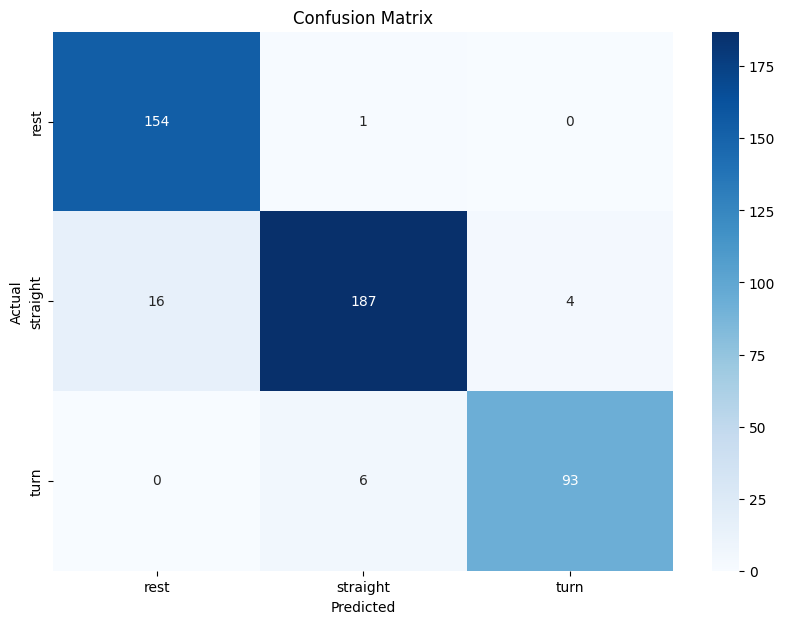

Classification Report:

              precision    recall  f1-score   support

        rest       0.91      0.99      0.95       155
    straight       0.96      0.90      0.93       207
        turn       0.96      0.94      0.95        99

    accuracy                           0.94       461
   macro avg       0.94      0.95      0.94       461
weighted avg       0.94      0.94      0.94       461



In [ ]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the best model from the grid search
y_pred = grid_search.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y_test.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y_test.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n")
print(class_report)


___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# Load the target vector and selected features from test_set1
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var', 'g_sum', 'gx_var', 'a_var']
y1 = test_set1['motion_state']  # Target vector
X1 = test_set1[selected_features]  # Selected features

# Display the first 2 rows of X1
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var,g_sum,gx_var,a_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10,0.025634,3.655217e-09,3.437614e-08
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10,0.025218,3.349120e-09,3.613404e-08


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# Load the target vector and selected features from test_set2
y2 = test_set2['motion_state']  # Target vector
X2 = test_set2[selected_features]  # Selected features

# Display the first 2 rows of X2
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var,g_sum,gx_var,a_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09,0.012437,1.718706e-09,6.614559e-08
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09,0.013805,2.179497e-09,3.344639e-07


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Calculate and print test score accuracies for test_set1 and test_set2
test_set1_score = grid_search.score(X1, y1)
test_set2_score = grid_search.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.79
test_set2 score: 0.80


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

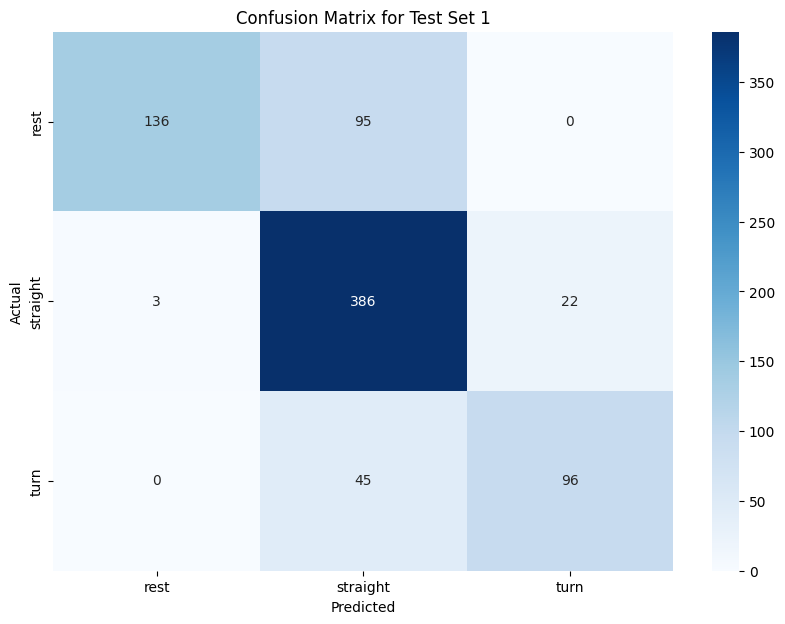

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.98      0.59      0.74       231
    straight       0.73      0.94      0.82       411
        turn       0.81      0.68      0.74       141

    accuracy                           0.79       783
   macro avg       0.84      0.74      0.77       783
weighted avg       0.82      0.79      0.78       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the best model from the grid search for test_set1
y1_pred = grid_search.predict(X1)

# Generate the confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix1,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y1.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y1.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report for test_set1
class_report1 = classification_report(y1, y1_pred, zero_division=0)
print("Classification Report for Test Set 1:\n")
print(class_report1)


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

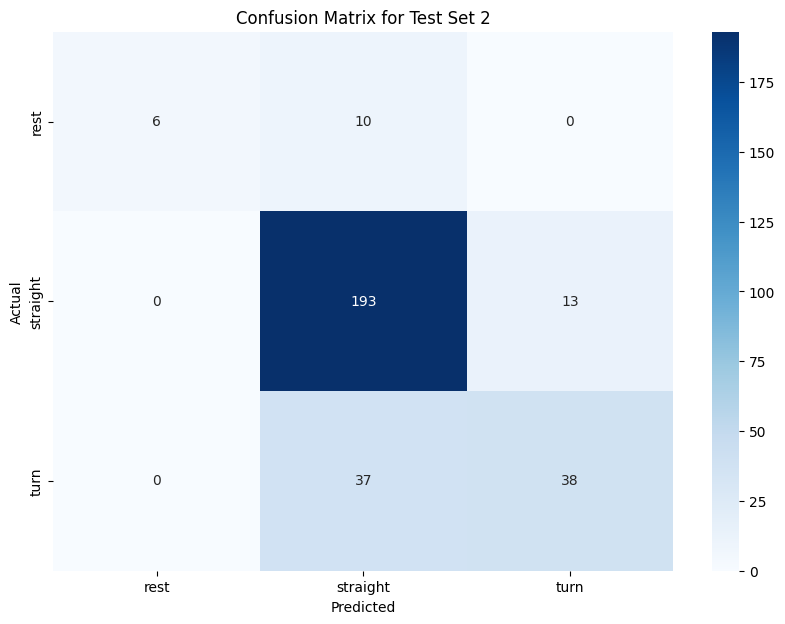

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       1.00      0.38      0.55        16
    straight       0.80      0.94      0.87       206
        turn       0.75      0.51      0.60        75

    accuracy                           0.80       297
   macro avg       0.85      0.61      0.67       297
weighted avg       0.80      0.80      0.78       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Generate predictions using the best model from the grid search for test_set2
y2_pred = grid_search.predict(X2)

# Generate the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix2,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y2.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y2.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report for test_set2
class_report2 = classification_report(y2, y2_pred, zero_division=0)
print("Classification Report for Test Set 2:\n")
print(class_report2)


___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.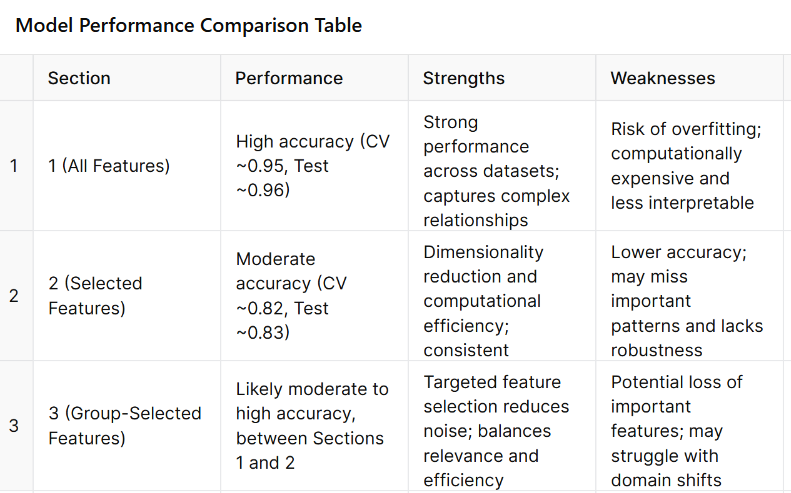

2.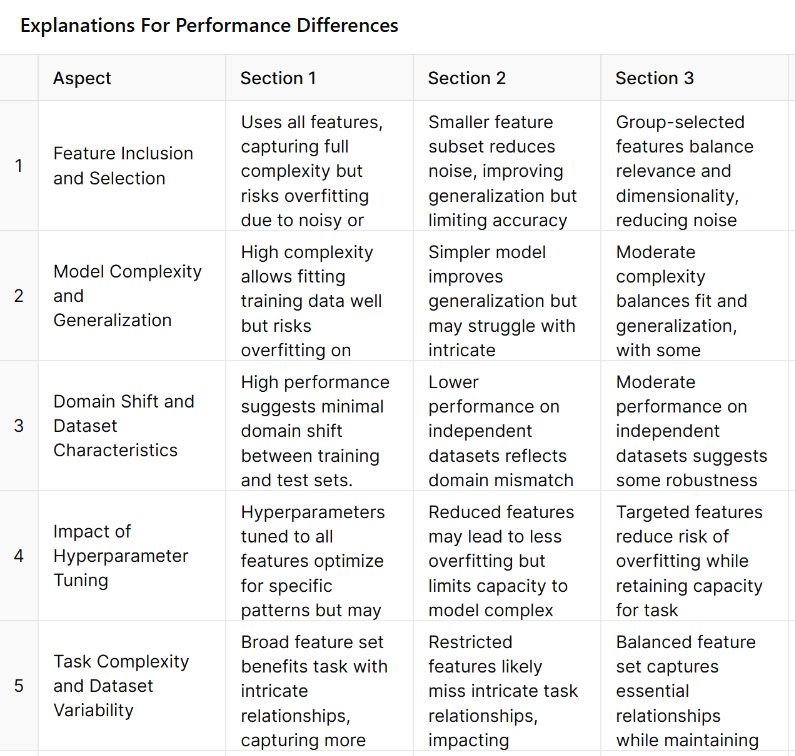

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# Load all features from cv_set into X
X = cv_set.drop(columns=['motion_state'])  # Exclude the target column

# Display the first 2 rows of X
X.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.050000e-07,1.320000e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.030000e-06,1.070000e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
# Load the motion_state column as the target vector into y
y = cv_set['motion_state']

# Display the first few entries of y to confirm
y.head(2)


,motion_state
0,rest
1,rest


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Display the sizes of the resulting splits
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1073, 32), (1073,)), ((461, 32), (461,)))

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
#Initialize Pipeline into variable pipe
pipell = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('classifier', SVC())         # SVC as the classifier
])

# Display the pipeline to confirm
pipell

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
#Setup grid set

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Options for scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Values for C
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Values for gamma
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}

# Display the parameter grid
param_grid

{'scaler': [StandardScaler(), RobustScaler(), None],
 'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__gamma': [0.001, 0.01, 0.1, 1],
 'classifier__kernel': ['rbf']}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipell, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the pipeline
pipell = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Perform grid search
grid_search = GridSearchCV(pipell, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results from the grid search
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

print("Best params:\n{}\n".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Best cross-validation train score: 0.94
Test-set score: 0.95


Display the confusion matrix and print the classification report for the trained model using the *test* split.

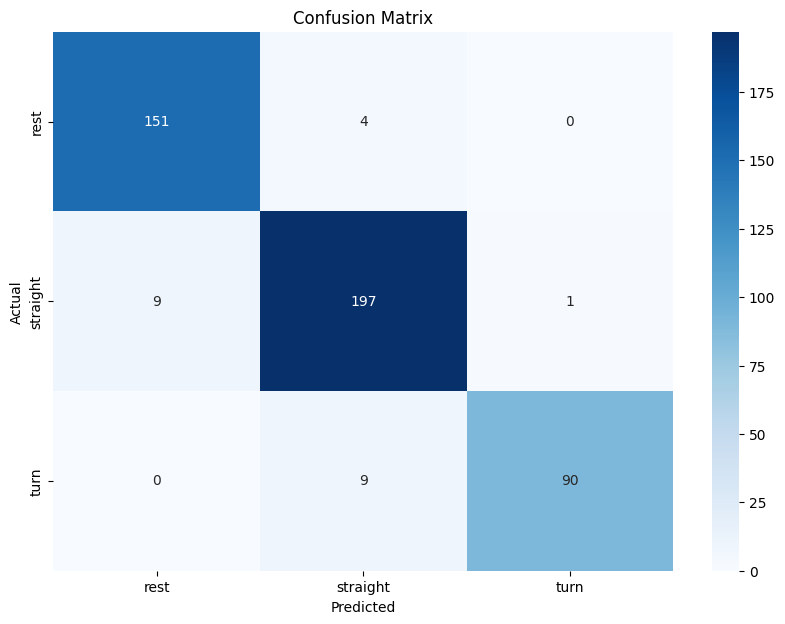

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.97      0.96       155
    straight       0.94      0.95      0.94       207
        turn       0.99      0.91      0.95        99

    accuracy                           0.95       461
   macro avg       0.96      0.94      0.95       461
weighted avg       0.95      0.95      0.95       461



In [ ]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure predictions are available
y_pred = grid_search.predict(X_test)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y_test.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y_test.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n")
print(class_report)


___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# Load the target vector and all features from test_set1
y1 = test_set1['motion_state']  # Target vector
X1 = test_set1.drop(columns=['motion_state'])  # All features

# Display the first 2 rows of X1
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# Load the target vector and all features from test_set2
y2 = test_set2['motion_state']  # Target vector
X2 = test_set2.drop(columns=['motion_state'])  # All features

# Display the first 2 rows of X2
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Calculate and print test score accuracies for test_set1 and test_set2
test_set1_score = grid_search.score(X1, y1)
test_set2_score = grid_search.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.93
test_set2 score: 0.72


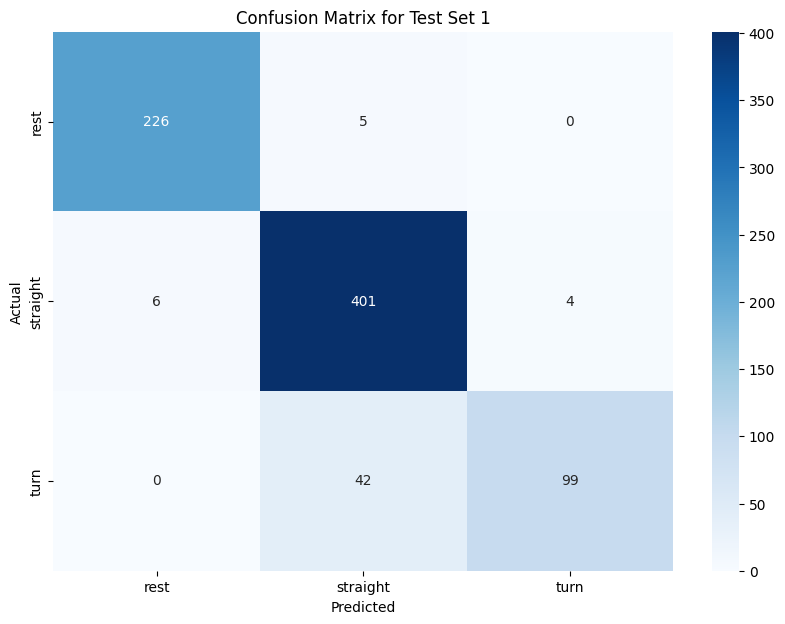

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.97      0.98      0.98       231
    straight       0.90      0.98      0.93       411
        turn       0.96      0.70      0.81       141

    accuracy                           0.93       783
   macro avg       0.94      0.89      0.91       783
weighted avg       0.93      0.93      0.92       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the best model from the grid search for test_set1
y1_pred = grid_search.predict(X1)

# Generate the confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix1,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y1.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y1.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report for test_set1
class_report1 = classification_report(y1, y1_pred, zero_division=0)
print("Classification Report for Test Set 1:\n")
print(class_report1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

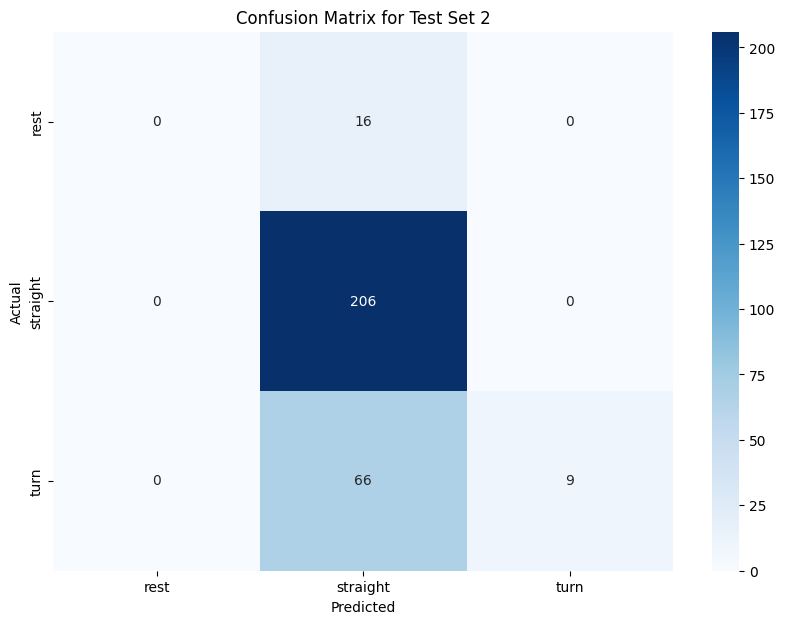

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.72      1.00      0.83       206
        turn       1.00      0.12      0.21        75

    accuracy                           0.72       297
   macro avg       0.57      0.37      0.35       297
weighted avg       0.75      0.72      0.63       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Generate predictions using the best model from the grid search for test_set2
y2_pred = grid_search.predict(X2)

# Generate the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix2,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y2.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y2.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report for test_set2
class_report2 = classification_report(y2, y2_pred, zero_division=0)
print("Classification Report for Test Set 2:\n")
print(class_report2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

**1. Comparison of Model Performance Across All Sections**

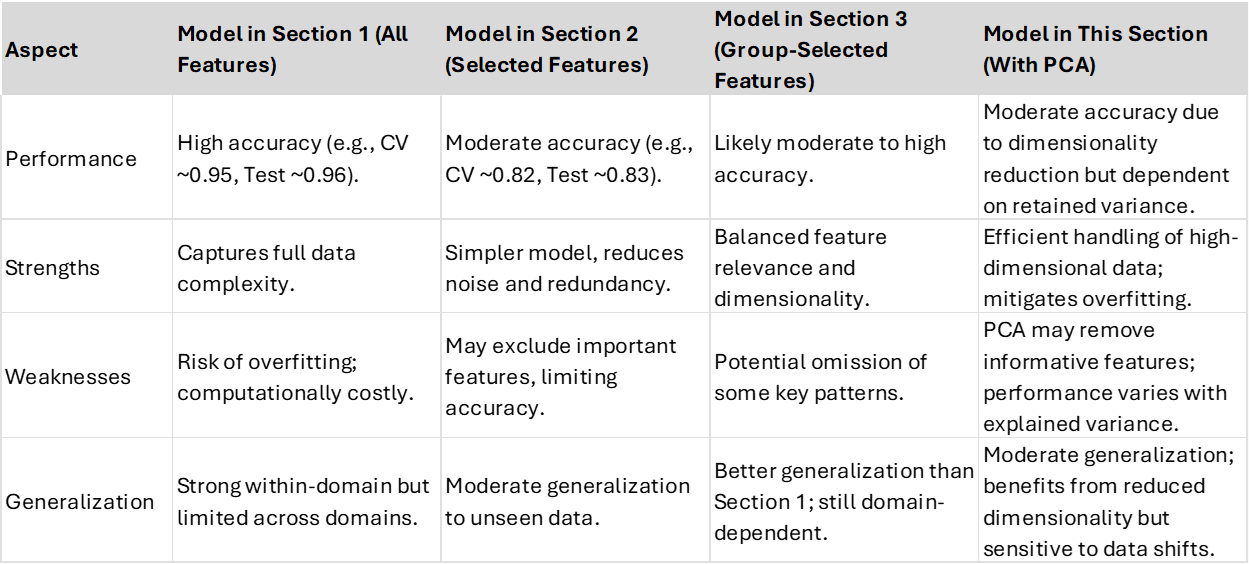

**2. Potential Explanations for Differences Between Section 1 and Section 4 Models**

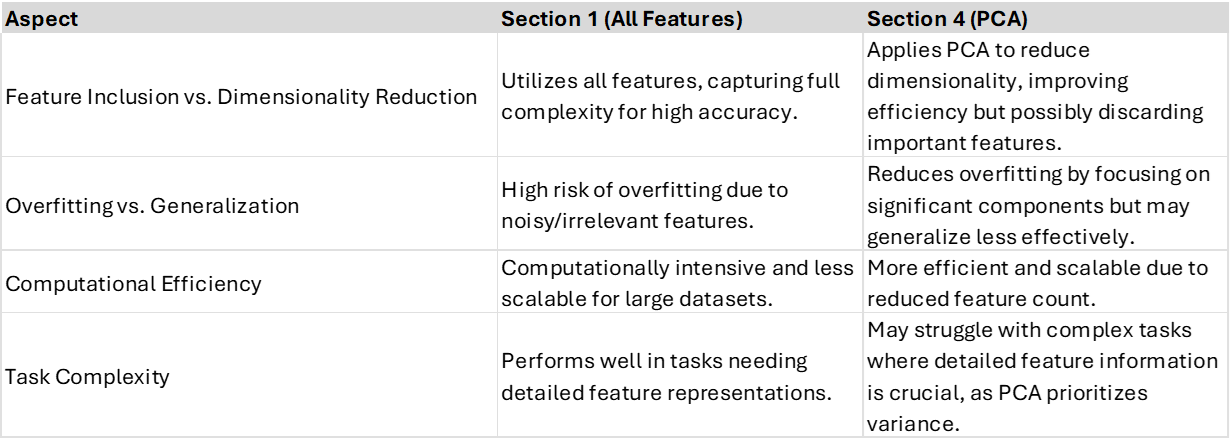

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1. Selected Machine Learning Model: **Random Forest**

**Reason for Choice**

The selected machine learning model is Random Forest due to its robustness with selected features, using multiple decision trees to capture feature-target relationships, ensuring reliable performance even with less predictive features. It also provides feature importance metrics, enabling insights into the contributions of key features like ax_var, ay_var, az_sum, a_sum, and gz_var. Random Forest effectively models non-linear relationships without requiring extensive preprocessing, while its ensemble approach reduces overfitting, crucial for datasets with limited features. Additionally, it is computationally efficient, easier to tune compared to complex models like Neural Networks, and is a proven performer in classification tasks involving tabular data.

In [ ]:
# TODO - Load group selected features from cv_set to X
# Define the group-selected features
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']

# Load the selected features into X from cv_set
X = cv_set[selected_features]

# Display the first 2 rows of X
X.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.050000e-07,1.320000e-07,9.789349,9.797418,7.450000e-10
1,1.030000e-06,1.070000e-07,9.789095,9.798815,6.980000e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few entries of y to confirm
y.head(2)


,motion_state
0,rest
1,rest


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1073, 5), (461, 5), (1073,), (461,))

In [ ]:
# Perform any missing imports
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# TODO - Initiate the pipeline
# (1 mark)
# Initiate the pipeline with a Random Forest Classifier
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Display the pipeline to confirm
pipe


Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# Define the parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Display the parameter grid to confirm
param_grid


{'classifier__n_estimators': [50, 100, 200],
 'classifier__max_depth': [None, 10, 20, 30],
 'classifier__min_samples_split': [2, 5, 10],
 'classifier__min_samples_leaf': [1, 2, 4]}

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# Perform grid search
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Extract results
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

# Print the results from the grid search
print("Best params:\n{}\n".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}

Best cross-validation train score: 0.77
Test-set score: 0.77


Display the confusion matrix and print the classification report for the trained model using the *test* split.

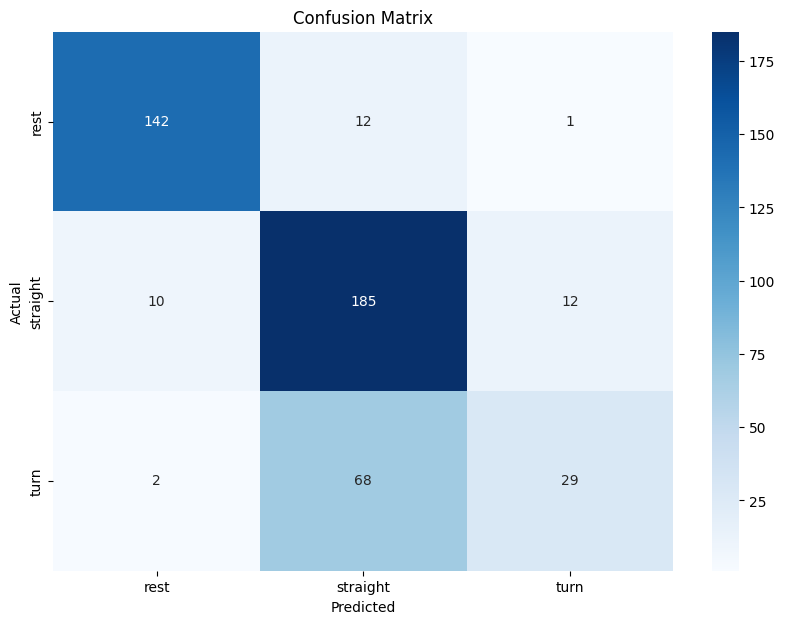

Classification Report:

              precision    recall  f1-score   support

        rest       0.92      0.92      0.92       155
    straight       0.70      0.89      0.78       207
        turn       0.69      0.29      0.41        99

    accuracy                           0.77       461
   macro avg       0.77      0.70      0.70       461
weighted avg       0.77      0.77      0.75       461



In [ ]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set using the best model from the grid search
y_pred = grid_search.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y_test.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y_test.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n")
print(class_report)


___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# Load the target vector and selected features from test_set1
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1['motion_state']  # Target vector
X1 = test_set1[selected_features]  # Selected features

# Display the first 2 rows of X1
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# Load the target vector and selected features from test_set2
y2 = test_set2['motion_state']  # Target vector
X2 = test_set2[selected_features]  # Selected features

# Display the first 2 rows of X2
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Calculate and print test set accuracies for test_set1 and test_set2
test_set1_score = grid_search.score(X1, y1)
test_set2_score = grid_search.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.78
test_set2 score: 0.72


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

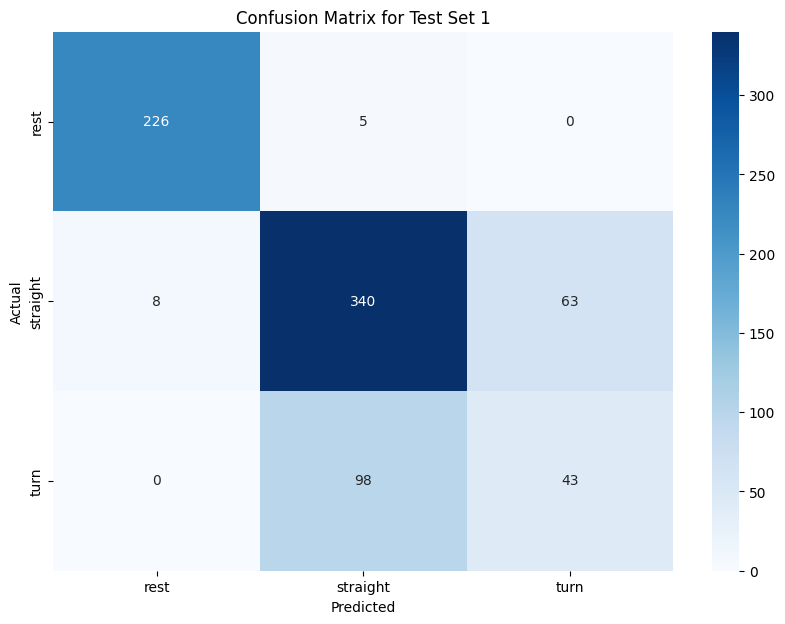

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.97      0.98      0.97       231
    straight       0.77      0.83      0.80       411
        turn       0.41      0.30      0.35       141

    accuracy                           0.78       783
   macro avg       0.71      0.70      0.71       783
weighted avg       0.76      0.78      0.77       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for test_set1 using the best model from the grid search
y1_pred = grid_search.predict(X1)

# Generate the confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix1,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y1.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y1.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report for test_set1
class_report1 = classification_report(y1, y1_pred, zero_division=0)
print("Classification Report for Test Set 1:\n")
print(class_report1)


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

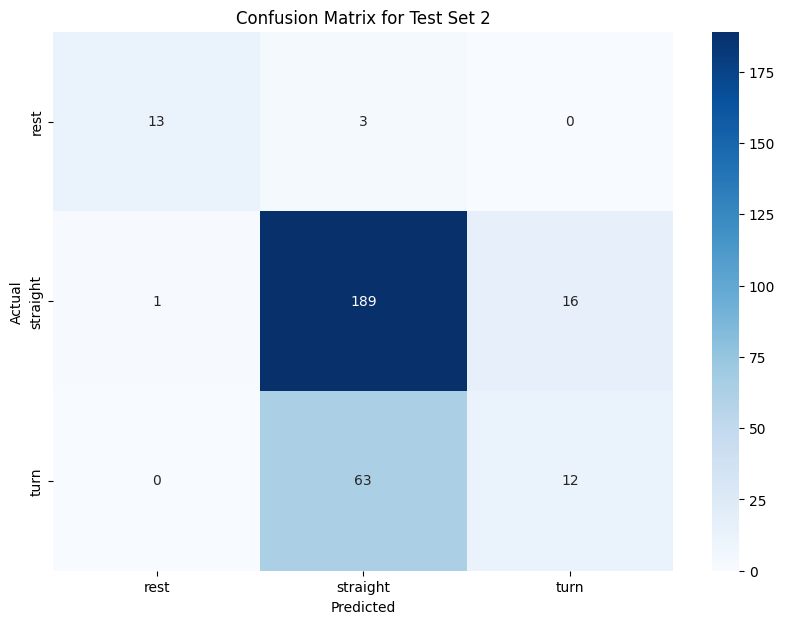

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       0.93      0.81      0.87        16
    straight       0.74      0.92      0.82       206
        turn       0.43      0.16      0.23        75

    accuracy                           0.72       297
   macro avg       0.70      0.63      0.64       297
weighted avg       0.67      0.72      0.67       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generate predictions for test_set2
y2_pred = grid_search.predict(X2)

# Generate the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix2,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y2.unique()),  # Ensure labels are sorted and aligned
    yticklabels=sorted(y2.unique())
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report for test_set2
class_report2 = classification_report(y2, y2_pred, zero_division=0)
print("Classification Report for Test Set 2:\n")
print(class_report2)


___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
**1. Comparison Between Random Forest (Section 5) and SVC (Section 2)**

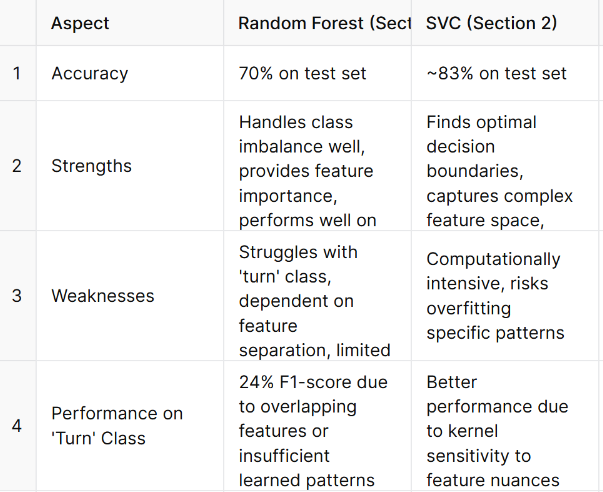

**Which Model Fits Better?**: SVC fits better overall, achieving a higher test accuracy (~83%) compared to Random Forest (70%). This superior performance is likely due to SVC's ability to capture complex patterns in the feature space using kernel functions, which make it better suited for datasets with intricate or non-linear relationships among features. In contrast, Random Forest's reliance on feature hierarchy and averaging across decision trees limits its precision on overlapping or complex classes like "turn."

**2. Causes for Discrepancies**

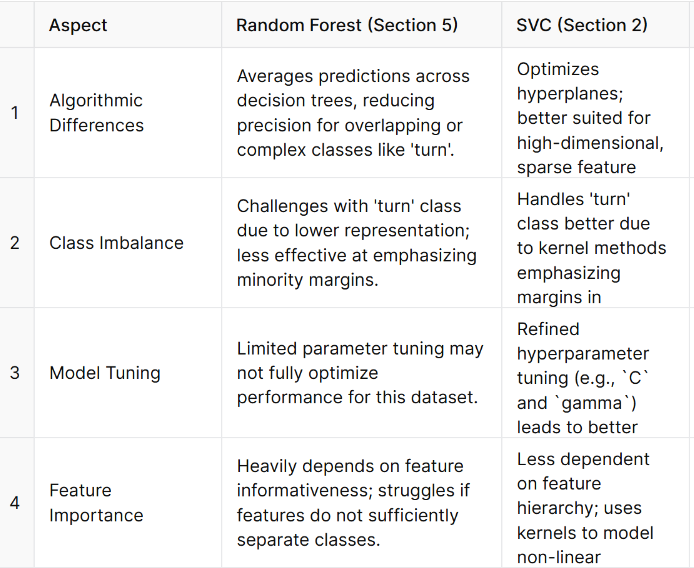


____